IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


LOADING THE DATASET

In [ ]:
df = pd.read_csv('/content/spam (1).csv', encoding='latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

IMPORTING LIBRARIES


In [ ]:
df.size

27860

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
old_columns = df.columns
new_columns = ["label", "message"] +list(old_columns[2:])
df.columns = new_columns

In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

label            0
message          0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.duplicated().values.any()

True

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


VISUALIZATION

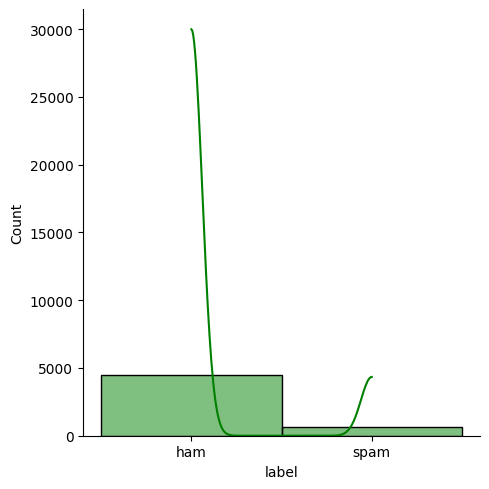

In [ ]:
sns.displot(df.label, kde = True, color = "green")

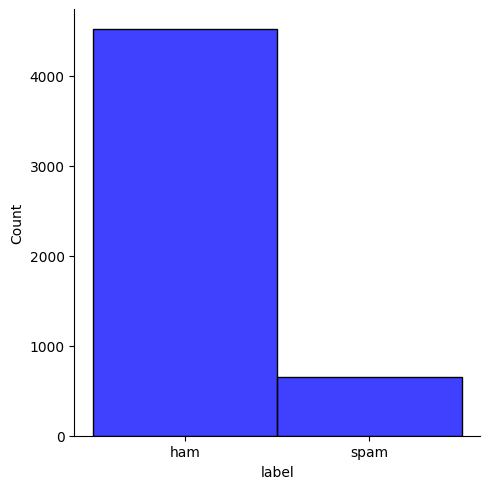

In [ ]:
sns.displot(df.label, color = "blue")

LABEL ENCODER FOR ENCODING CATEGORICAL VARIABLES INTO NUMERICAL VALUES

In [ ]:
encoder = LabelEncoder()
df["label"] = encoder.fit_transform(df["label"])

In [ ]:
df.head()

,label,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


TF-IDF VECTORIZATION

In [ ]:
vectorizer = TfidfVectorizer()


In [2]:
x = vectorizer.fit_transform(df["message"])

NameError: name 'vectorizer' is not defined

In [ ]:
x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = df["label"]

In [ ]:
x.size

68018

In [ ]:
y.size

5169

In [ ]:
x.shape

(5169, 8672)

In [ ]:
y.shape

(5169,)

In [ ]:
df.count()

label         5169
message       5169
Unnamed: 2      43
Unnamed: 3      10
Unnamed: 4       5
dtype: int64

SPAM LABEL VISUALIZATION USING PIE-CHART

In [ ]:
p, k =len(df[df["label"] == 1]), len(df[df["label"] == 0])
print(p, k)

653 4516


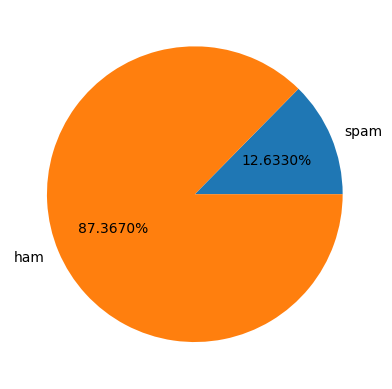

<Figure size 400x600 with 0 Axes>

<Figure size 400x600 with 0 Axes>

In [ ]:
label = np.array(["spam", "ham"])
values = np.array([p, k])
plt.pie(values, labels = label, autopct = "%0.4f%%")
plt.show()
plt.figure(figsize = (4, 6))

PREPROCESSING THE DATA

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 24)

NAIVE BAYES CLASSIFIER

In [ ]:
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train, y_train)

MultinomialNB()

In [ ]:
nb_predictions = naive_bayes_model.predict(x_test)

In [ ]:
print("Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions))
print("precision score:", precision_score(y_test, nb_predictions))
print("recall score:", recall_score(y_test, nb_predictions))
print("f1 score:", f1_score(y_test, nb_predictions))


Naive Bayes Model:
Accuracy: 0.9477756286266924
Confusion Matrix:
 [[1818    0]
 [ 108  142]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1818
           1       1.00      0.57      0.72       250

    accuracy                           0.95      2068
   macro avg       0.97      0.78      0.85      2068
weighted avg       0.95      0.95      0.94      2068

precision score: 1.0
recall score: 0.568
f1 score: 0.7244897959183673


LOGISTIC REGRESSION MODEL

In [ ]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
lr_predictions = logistic_regression_model.predict(x_test)

In [ ]:
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions))
print("precision score:", precision_score(y_test, lr_predictions))
print("recall score:", recall_score(y_test, lr_predictions))
print("f1 score:", f1_score(y_test, lr_predictions))

Logistic Regression Model:
Accuracy: 0.9530947775628626
Confusion Matrix:
 [[1816    2]
 [  95  155]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1818
           1       0.99      0.62      0.76       250

    accuracy                           0.95      2068
   macro avg       0.97      0.81      0.87      2068
weighted avg       0.95      0.95      0.95      2068

precision score: 0.9872611464968153
recall score: 0.62
f1 score: 0.7616707616707616


SUPPORT VECTOR MACHINE

In [ ]:
svm_model = SVC(kernel='linear')
svm_model.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
svm_predictions = svm_model.predict(x_test)

In [ ]:
print("SVM Model:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Classification Report:\n", classification_report(y_test, svm_predictions))
print("precision score:", precision_score(y_test, svm_predictions))
print("recall score:", recall_score(y_test, svm_predictions))
print("f1 score:", f1_score(y_test, svm_predictions))

SVM Model:
Accuracy: 0.9792069632495164
Confusion Matrix:
 [[1816    2]
 [  41  209]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1818
           1       0.99      0.84      0.91       250

    accuracy                           0.98      2068
   macro avg       0.98      0.92      0.95      2068
weighted avg       0.98      0.98      0.98      2068

precision score: 0.990521327014218
recall score: 0.836
f1 score: 0.9067245119305857
